In [136]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sn

In [137]:
pd.set_option('display.max_columns', None)

In [138]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

In [139]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [140]:
train = train.drop(columns='TransDetFactor')
test = test.drop(columns='TransDetFactor')

train = train.drop(columns='CropTillageDate')
test = test.drop(columns='CropTillageDate')

train = train.drop(columns='RcNursEstDate')
test = test.drop(columns='RcNursEstDate')

train = train.drop(columns='Harv_date')
test = test.drop(columns='Harv_date')

train = train.drop(columns='TransplantingIrrigationPowerSource')
test = test.drop(columns='TransplantingIrrigationPowerSource')

train = train.drop(columns='Stubble_use')
test = test.drop(columns='Stubble_use')


# train = train.drop(columns='Threshing_method')
# test = test.drop(columns='Threshing_method')

train = train.drop(columns='CropEstMethod')
test = test.drop(columns='CropEstMethod')

train = train.drop(columns='SeedingSowingTransplanting')
test = test.drop(columns='SeedingSowingTransplanting')

train = train.drop(columns='Threshing_date')
test = test.drop(columns='Threshing_date')

train = train.drop(columns='NursDetFactor')
test = test.drop(columns='NursDetFactor')

train = train.drop(columns='LandPreparationMethod')
test = test.drop(columns='LandPreparationMethod')

In [141]:
train['FirstTopDressFert'] = train['FirstTopDressFert'].replace('Urea DAP','DAP Urea')
test['FirstTopDressFert'] = test['FirstTopDressFert'].replace('Urea DAP','DAP Urea')

train['CropbasalFerts'] = train['CropbasalFerts'].replace('Urea DAP','DAP Urea')
test['CropbasalFerts'] = test['CropbasalFerts'].replace('Urea DAP','DAP Urea')

In [142]:
train['FirstTopDressFert'].value_counts()

Urea            2798
DAP Urea         499
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: FirstTopDressFert, dtype: int64

<Axes: >

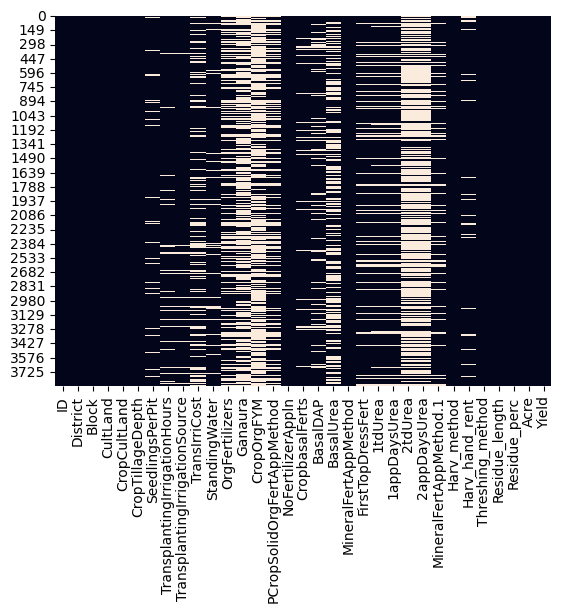

In [143]:
sn.heatmap(train.isna(),cbar=None )

In [144]:
train

,ID,District,Block,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,5,2.0,5.0,Boring,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,NaN,machine,30,40,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,5,2.0,5.0,Boring,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,3.0,machine,24,10,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,6,2.0,4.0,Boring,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,480.0,machine,30,10,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,6,2.0,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,240.0,hand,26,10,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,4,2.0,9.0,Boring,300.0,2.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,NaN,machine,24,40,0.468750,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,ID_7ZZQ6R4XB4FK,Nalanda,Rajgir,28,28,6,NaN,7.0,Boring,360.0,5.0,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,18.0,12.0,Broadcasting,Urea,12.0,45.0,NaN,NaN,Broadcasting,machine,NaN,machine,25,40,0.375000,720
3866,ID_PVVDF6LK6FO8,Vaishali,Mahua,5,5,5,1.0,3.0,Boring,NaN,3.0,NaN,NaN,NaN,NaN,3,DAP,6.0,NaN,RootApplication,Urea,6.0,45.0,6.0,6.0,Broadcasting,hand,4.0,hand,30,10,0.136364,250
3867,ID_RBYVUPRATVMW,Nalanda,Noorsarai,50,45,5,1.0,6.0,Boring,120.0,5.0,Ganaura,1.0,NaN,Broadcasting,1,Urea,NaN,24.0,Broadcasting,NaN,NaN,NaN,NaN,NaN,NaN,hand,1200.0,hand,25,10,0.375000,600
3868,ID_ARE9QWENJNJ2,Jamui,Khaira,20,20,3,4.0,2.0,Canal,NaN,9.0,NaN,NaN,NaN,NaN,1,DAP Urea,7.0,10.0,Broadcasting,NaN,NaN,NaN,NaN,NaN,NaN,hand,100.0,hand,25,10,0.227273,400


<Axes: >

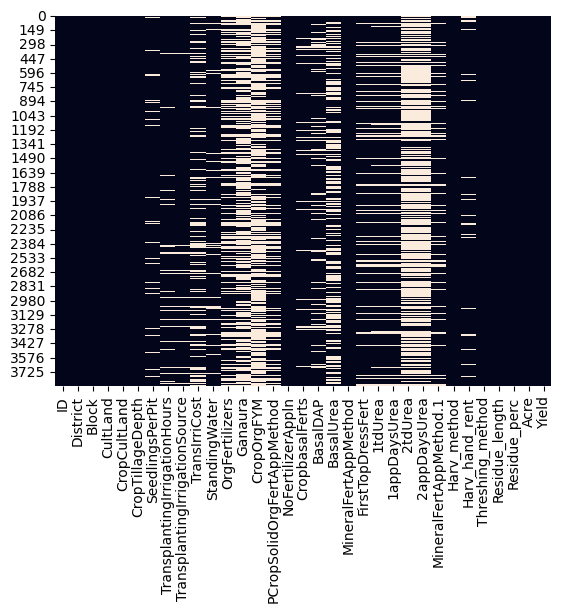

In [145]:
sn.heatmap(train.isna(),cbar=None )
# sn.heatmap(test.isna(),cbar=None )

In [146]:
nan_date = '2023-11-9'
nan_word = 'default'

In [147]:
def valide_date(date):
    try:
        return bool(datetime.datetime.strptime(date,'%Y-%m-%d'))
    except ValueError:
        return False

In [148]:
origin = datetime.datetime(1970,1,1)
days = (datetime.datetime.strptime('2023-11-9', '%Y-%m-%d') - origin).days
days
datetime.datetime.strptime('2022-07-20', '%Y-%m-%d').month

7

In [149]:
# train['Threshing_date'] = train['Threshing_date'].fillna(nan_date)
# test['Threshing_date'] = test['Threshing_date'].fillna(nan_date)

# train['CropTillageD'] = train['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').day)
# test['CropTillageD'] = test['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').day)

# train['CropTillagey'] = train['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').year)
# test['CropTillagey'] = test['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').year)

# train['CropTillagem'] = train['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').month)
# test['CropTillagem'] = test['Threshing_date'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').month)

# train = train.drop(columns='Threshing_date')
# test = test.drop(columns='Threshing_date')

In [150]:
def define_num_values(data, col_name):
    result = None
    size = len(set(data[col_name]))
    keys = list(set(data[col_name]))
    if(not valide_date(data[col_name][0])):
        values = list(np.arange(1,size+1))
        values = list(np.array(values)/max(values))
        result =  dict(list(zip(keys, values)))
#     else:
#         values = list(set(data[col_name].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').day))) 
#         values = list(np.array(values)/min(values))
#         result = dict(list(zip(keys, values)))
    data[col_name] =  data[col_name].replace(result) 
    

In [151]:
def epurate_data_to_string_values(data):
    define_num_values(data, 'District')
    define_num_values(data, 'Block')
#     define_num_values(data, 'LandPreparationMethod')
#     define_num_values(data, 'CropTillageDate')
#     define_num_values(data, 'CropEstMethod')

#     data['RcNursEstDate'] = data['RcNursEstDate'].fillna(nan_date)
#     define_num_values(data, 'RcNursEstDate')

#     define_num_values(data, 'SeedingSowingTransplanting')

#     data['NursDetFactor'] = data['NursDetFactor'].fillna(nan_word)
#     define_num_values(data, 'NursDetFactor')

#     data['TransDetFactor'] = data['TransDetFactor'].fillna(nan_word)
#     define_num_values(data, 'TransDetFactor')

    data['TransplantingIrrigationSource'] = data['TransplantingIrrigationSource'].fillna(nan_word)
    define_num_values(data, 'TransplantingIrrigationSource')

#     data['TransplantingIrrigationPowerSource'] = data['TransplantingIrrigationPowerSource'].fillna(nan_word)
#     define_num_values(data, 'TransplantingIrrigationPowerSource')

    data['OrgFertilizers'] = data['OrgFertilizers'].fillna(nan_word)
    define_num_values(data, 'OrgFertilizers')

    data['PCropSolidOrgFertAppMethod'] = data['PCropSolidOrgFertAppMethod'].fillna(nan_word)
    define_num_values(data, 'PCropSolidOrgFertAppMethod')

    data['CropbasalFerts'] = data['CropbasalFerts'].fillna(nan_word)
    define_num_values(data, 'CropbasalFerts')

    define_num_values(data, 'MineralFertAppMethod')

    data['FirstTopDressFert'] = data['FirstTopDressFert'].fillna(nan_word)
    define_num_values(data, 'FirstTopDressFert')

    data['2tdUrea'] = data['2tdUrea'].fillna(0.01)
    data['2appDaysUrea'] = data['2appDaysUrea'].fillna(0.01)

    data['MineralFertAppMethod.1'] = data['MineralFertAppMethod.1'].fillna(nan_word)
    define_num_values(data, 'MineralFertAppMethod.1')

    define_num_values(data, 'Harv_method')
#     define_num_values(data, 'Harv_date')

#     define_num_values(data, 'Threshing_date')
    define_num_values(data, 'Threshing_method')
#     define_num_values(data, 'Stubble_use')

In [152]:
epurate_data_to_string_values(train)
epurate_data_to_string_values(test)

In [153]:
train['Harv_hand_rent'] = max(train['Harv_hand_rent'])/max(train['Harv_hand_rent'])
test['Harv_hand_rent'] = max(test['Harv_hand_rent'])/max(test['Harv_hand_rent'])



In [154]:
train

,ID,District,Block,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Acre,Yield
0,ID_GTFAC7PEVWQ9,0.75,0.333333,45,40,5,2.0,5.0,0.285714,200.0,2.0,0.25000,NaN,NaN,0.4,2,0.529412,NaN,20.0,0.666667,0.785714,15.0,18.0,0.01,0.01,0.50,0.5,NaN,0.5,30,40,0.312500,600
1,ID_TK40ARLSPOKS,0.75,0.222222,26,26,5,2.0,5.0,0.285714,125.0,3.0,0.25000,NaN,NaN,0.4,2,0.235294,15.0,10.0,0.666667,0.785714,20.0,39.0,0.01,0.01,0.50,1.0,NaN,0.5,24,10,0.312500,600
2,ID_1FJY2CRIMLZZ,0.50,0.444444,10,10,6,2.0,4.0,0.285714,80.0,2.0,0.50000,1.0,1.0,0.6,2,0.794118,4.0,NaN,0.333333,0.785714,5.0,65.0,0.01,0.01,0.75,1.0,NaN,0.5,30,10,0.148148,225
3,ID_I3IPXS4DB7NE,0.50,0.444444,15,15,6,2.0,NaN,0.142857,NaN,NaN,0.59375,1.0,NaN,0.6,2,0.235294,6.0,3.0,0.666667,0.785714,5.0,5.0,0.01,0.01,0.50,1.0,NaN,1.0,26,10,0.222222,468
4,ID_4T8YQWXWHB4A,0.75,0.333333,60,60,4,2.0,9.0,0.285714,300.0,2.0,0.25000,NaN,NaN,0.4,2,0.235294,15.0,30.0,0.666667,0.785714,30.0,26.0,0.01,0.01,0.50,0.5,NaN,0.5,24,40,0.468750,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,ID_7ZZQ6R4XB4FK,0.75,0.222222,28,28,6,NaN,7.0,0.285714,360.0,5.0,0.59375,1.0,NaN,0.6,2,0.235294,18.0,12.0,0.666667,0.785714,12.0,45.0,0.01,0.01,0.50,0.5,NaN,0.5,25,40,0.375000,720
3866,ID_PVVDF6LK6FO8,0.25,0.666667,5,5,5,1.0,3.0,0.285714,NaN,3.0,0.25000,NaN,NaN,0.4,3,0.794118,6.0,NaN,1.000000,0.785714,6.0,45.0,6.00,6.00,0.50,1.0,NaN,1.0,30,10,0.136364,250
3867,ID_RBYVUPRATVMW,0.75,0.333333,50,45,5,1.0,6.0,0.285714,120.0,5.0,0.59375,1.0,NaN,0.8,1,0.529412,NaN,24.0,0.666667,0.214286,NaN,NaN,0.01,0.01,1.00,1.0,NaN,1.0,25,10,0.375000,600
3868,ID_ARE9QWENJNJ2,1.00,0.555556,20,20,3,4.0,2.0,1.000000,NaN,9.0,0.25000,NaN,NaN,0.4,1,0.235294,7.0,10.0,0.666667,0.214286,NaN,NaN,0.01,0.01,1.00,1.0,NaN,1.0,25,10,0.227273,400


In [155]:
def epurate_data_fill_nan_values(train):
    nan_aprox = 0.01
    train['TransplantingIrrigationHours'] = train['TransplantingIrrigationHours'].fillna(nan_aprox)
    train['StandingWater'] = train['StandingWater'].fillna(nan_aprox)
    train['Ganaura'] = train['Ganaura'].fillna(nan_aprox)
    train['CropOrgFYM'] = train['CropOrgFYM'].fillna(nan_aprox)
    train['1appDaysUrea'] = train['1appDaysUrea'].fillna(nan_aprox)
    train['Harv_hand_rent'] = train['Harv_hand_rent'].fillna(nan_aprox)
    train['BasalUrea'] = train['BasalUrea'].fillna(nan_aprox)
    train['1tdUrea'] = train['1tdUrea'].fillna(nan_aprox)
    train['BasalDAP'] = train['BasalDAP'].fillna(nan_aprox)
    train['TransIrriCost'] = train['TransIrriCost'].fillna(nan_aprox)
    train['SeedlingsPerPit'] = train['SeedlingsPerPit'].fillna(nan_aprox)

In [156]:
epurate_data_fill_nan_values(train)
epurate_data_fill_nan_values(test)

<Axes: >

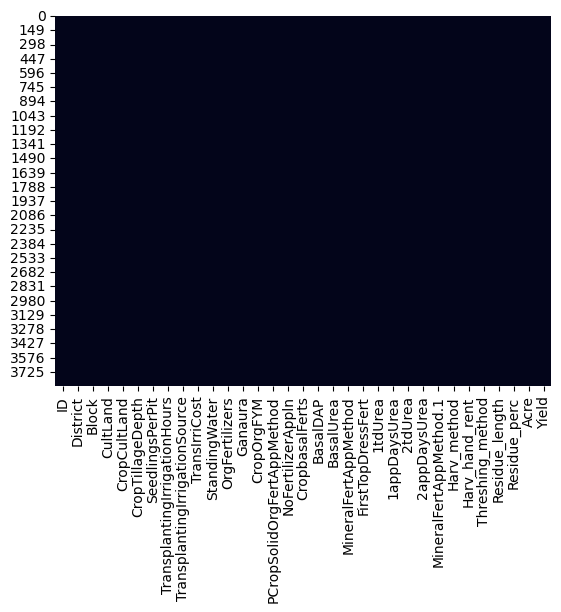

In [157]:
sn.heatmap(train.isna(),cbar=None )

<Axes: >

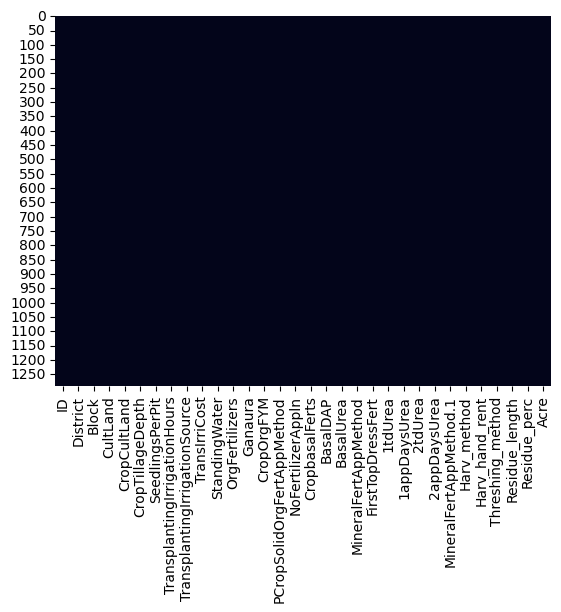

In [158]:
sn.heatmap(test.isna(),cbar=None )

In [159]:
# Split data for training and local testing

X = train.drop(['ID', 'Yield'], axis = 1)
y = train.Yield


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, shuffle=False)

In [161]:
# Instantiate model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.svm as SVR
# model = LogisticRegression(penalty='none')573.0149502975144
model = RandomForestRegressor(random_state = 1234)#191.2832262435558
# model = DecisionTreeRegressor()
# model = KNeighborsRegressor(n_neighbors=10)
# Fit model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Measure model performance
mean_squared_error(y_test, preds, squared=False)

191.2832262435558

In [162]:
# Make predictions on the Zindi test set
test_df = test[X.columns]
preds = model.predict(test_df.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
sub.to_csv('BenchmarkSubmission3.csv', index = False)

sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,646.94
1,ID_SO3VW2X4QO93,417.54
2,ID_UKUQ7JM8E894,474.99
3,ID_QUISMWEZR2H4,341.75
4,ID_25JGI455VKCZ,554.97
